# 개인프로젝트 1

## 다음 분기에 어떤 게임을 설계해야 할까?

#### 매출액과 나머지 피쳐들을 비교하여 어느 지역에 무슨 게임을 개발하면 좋을지에 대해서 판단해볼 예정

---

# 데이터 불러오기 및 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv('./vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


---

In [3]:
del df['Unnamed: 0']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

### 매출액에 관련된 피쳐들을 numeric형식으로 바꿔야겠다고 판단

In [5]:
for k in ("NA_Sales","EU_Sales","JP_Sales","Other_Sales"):

    for i in range(len(df[k])):
        if 'K' in df[k][i]:
            df[k][i] = int(float(df[k][i][:-1])*1000)
        elif 'M' in df[k][i]:
            df[k][i] = int(float(df[k][i][:-1])*1000000)
        else:
            df[k][i] = int(float(df[k][i])*1000000)

<ipython-input-5-df9edf454017>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[k][i] = int(float(df[k][i])*1000000)
<ipython-input-5-df9edf454017>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[k][i] = int(float(df[k][i][:-1])*1000)
<ipython-input-5-df9edf454017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[k][i] = int(float(df[k][i][:-1])*1000000)


In [6]:
for k in ("NA_Sales","EU_Sales","JP_Sales","Other_Sales"):
    df[k] = pd.to_numeric(df[k])
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales         int64
EU_Sales         int64
JP_Sales         int64
Other_Sales      int64
dtype: object

In [7]:
(df.isnull().sum() / len(df)) * 100

Name           0.000000
Platform       0.000000
Year           1.632727
Genre          0.301241
Publisher      0.349440
NA_Sales       0.000000
EU_Sales       0.000000
JP_Sales       0.000000
Other_Sales    0.000000
dtype: float64

### 매출액 관련데이터 외에만 고려해서, null값의 비율이 크지 않기때문에 제외하고 분석을 진행할 예정
### 매출액의 0원도 null값으로 판단되나, 그 지역에서 발매하지 않거나 등의 이슈가 있을거라 판단돼 따로 처리하지 않을 예정

In [8]:
df = df.dropna(axis=0)
df.shape

(16241, 9)

---

In [9]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000,0,0,10000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,20000,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000,90000,0,40000
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000,40000,0,10000
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000,190000,30000,130000
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000,50000,250000,30000


---

### 어떤 피쳐를 기준으로 나눌 수 있을까?
#### 아래의 두 피쳐가 가장 가능성이 있다고 판단하였고, 그중 Genre일 것이라 생각

In [10]:
df['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [11]:
df['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

---

In [12]:
df['Genre'] = df['Genre'].astype("category")

<ipython-input-12-0c12794cf08d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre'] = df['Genre'].astype("category")


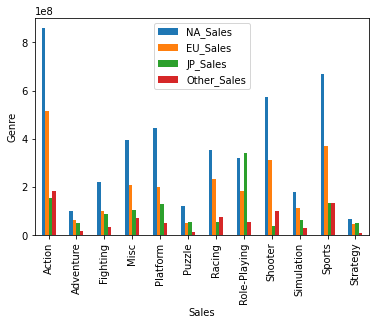

In [13]:
G_df = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
G_df = G_df.groupby('Genre').sum() 
G_df.plot(kind='bar')
plt.xlabel('Sales')
plt.ylabel('Genre')
plt.show()

#### 전체적으로 매출액을 비교해볼 수 있을 것 같다.

####하지만 지역별로 매출액의 규모자체가 차이나기때문에 한눈에 이해하기에는 조금 힘들다고 판단
####지역별로 나눠서 시각화를 해보자

<function matplotlib.pyplot.show(close=None, block=None)>

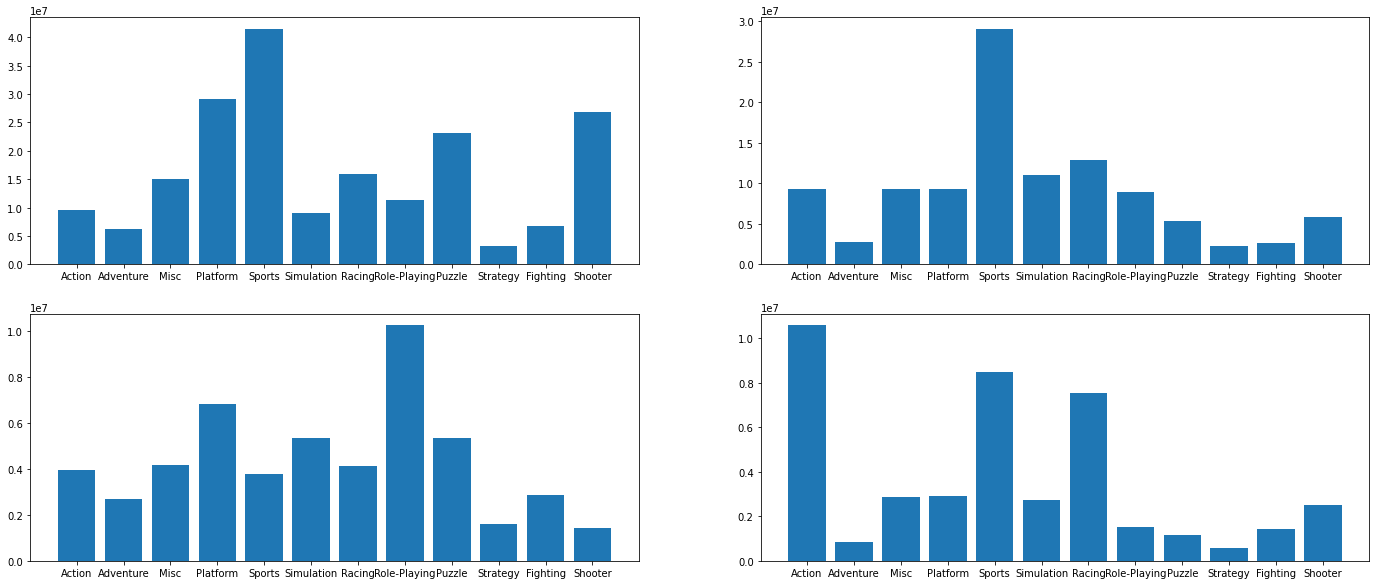

In [14]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(24,10)
axes[0][0].bar(df['Genre'], df['NA_Sales'])
axes[0][1].bar(df['Genre'], df['EU_Sales'])
axes[1][0].bar(df['Genre'], df['JP_Sales'])
axes[1][1].bar(df['Genre'], df['Other_Sales'])
plt.show

---

### 연도별로 매출액의 차이는 있을까? 

In [15]:
df = df.reset_index()
del df['index']
df['Year'] = df['Year'].astype(int)

for i in range(len(df['Year'])):
    if df['Year'][i]<100:
        if df['Year'][i]>20:
            df['Year'][i] = int('19'+str(df['Year'][i]))
        else:
            if df['Year'][i]<10:
                df['Year'][i] = int('200'+str(df['Year'][i]))
            else:
                df['Year'][i] = int('20'+str(df['Year'][i]))
            
df['Year'].unique()

<ipython-input-15-edfee6e64646>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][i] = int('200'+str(df['Year'][i]))
<ipython-input-15-edfee6e64646>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][i] = int('19'+str(df['Year'][i]))
<ipython-input-15-edfee6e64646>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][i] = int('20'+str(df['Year'][i]))


array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

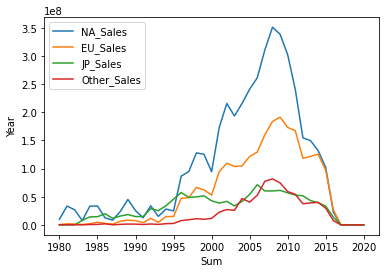

In [17]:
Y_df = df[['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
Y_df = Y_df.groupby('Year').sum() 
Y_df.plot()
plt.xlabel('Sum')
plt.ylabel('Year')
plt.show()